In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import re


In [33]:
def load_train_data(sub, video, scenario):
    # create file name based on parameters
    file_name = f"sub_{sub}_vid_{video}.csv"

    # load data files
    train_physiology = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/physiology", file_name), index_col="time")
    train_annotations = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/annotations", file_name), index_col="time")

    return train_physiology, train_annotations

sub = 4
video = 1
scenario = 1

train_physiology, train_annotations = load_train_data(sub, video, scenario)

print(train_physiology.head())
print(train_annotations.head())


        ecg     bvp     gsr     rsp     skt  emg_zygo  emg_coru  emg_trap
time                                                                     
0     0.846  36.409  16.026  42.197  28.541     4.496     5.072     6.138
1     0.859  35.182  16.003  42.226  28.558     4.536     5.193     6.098
2     0.856  35.371  16.027  42.226  28.559     4.618     5.275     6.178
3     0.862  35.584  16.011  42.217  28.559     4.578     5.154     6.139
4     0.872  35.768  16.058  42.207  28.565     4.578     5.234     6.179
      valence  arousal
time                  
0         5.0      5.0
50        5.0      5.0
100       5.0      5.0
150       5.0      5.0
200       5.0      5.0


For every video (stimulus) of each participant we have a .csv file of annotations and physiological data for **train**, and a .csv of annotations for **test**, respectively

### Physiology
8 columns: 
- **ecg:** pre-gelled electrodes placed on the participants’ chests in a triangular configuration.
- **bvp:** Photoplethysmography (middle finger of participants’ non-dominant hand)
- **gsr:** index and ring fingers of participants’ non-dominant hand.
- **rsp:** Respiration was measured with a piezo-electric belt attached under the armpits and above the breasts
- **skt:** epoxy rod thermistor attached to the pinky finger of participants’ non-dominant hand.
- **emg_zygo:** Muscle activity for the  zygomaticus major
- **emg_coru:** Muscle activity for the corrugator supercilii 
- **emg_trap:** Muscle activity for the trapezius 

### Annotations
2 columns:
- **valence**
1 (negative) to 9 (positive)
- **arousal**
1 (low arousal) to 9 (high arousal)

In [39]:
# Data overview
print(train_physiology.shape)
print(train_annotations.shape)


(103001, 8)
(2061, 2)


In [43]:
print("This videos has a length of", train_physiology.shape[0] / 1000)

This videos has a length of 103.001


In [16]:
print(train_physiology.describe())
print(train_physiology.isnull().sum())

                 ecg            bvp            gsr            rsp   
count  103001.000000  103001.000000  103001.000000  103001.000000  \
mean        0.830233      36.175913      16.079553      42.899472   
std         0.253573       1.626437       0.206599       0.482330   
min        -0.632000      32.357000      13.334000      40.745000   
25%         0.757000      34.913000      15.885000      42.623000   
50%         0.803000      36.060000      16.078000      42.865000   
75%         0.935000      37.199000      16.252000      43.213000   
max         1.372000      41.154000      16.620000      44.229000   

                 skt       emg_zygo       emg_coru       emg_trap  
count  103001.000000  103001.000000  103001.000000  103001.000000  
mean       28.536334       4.741702       6.561100       6.780106  
std         0.010788       0.454529       0.877712       1.370981  
min        28.503000       4.333000       4.950000       5.648000  
25%        28.527000       4.577000   

Make a figure that combines both physiological data and annotations from a video of a participant.

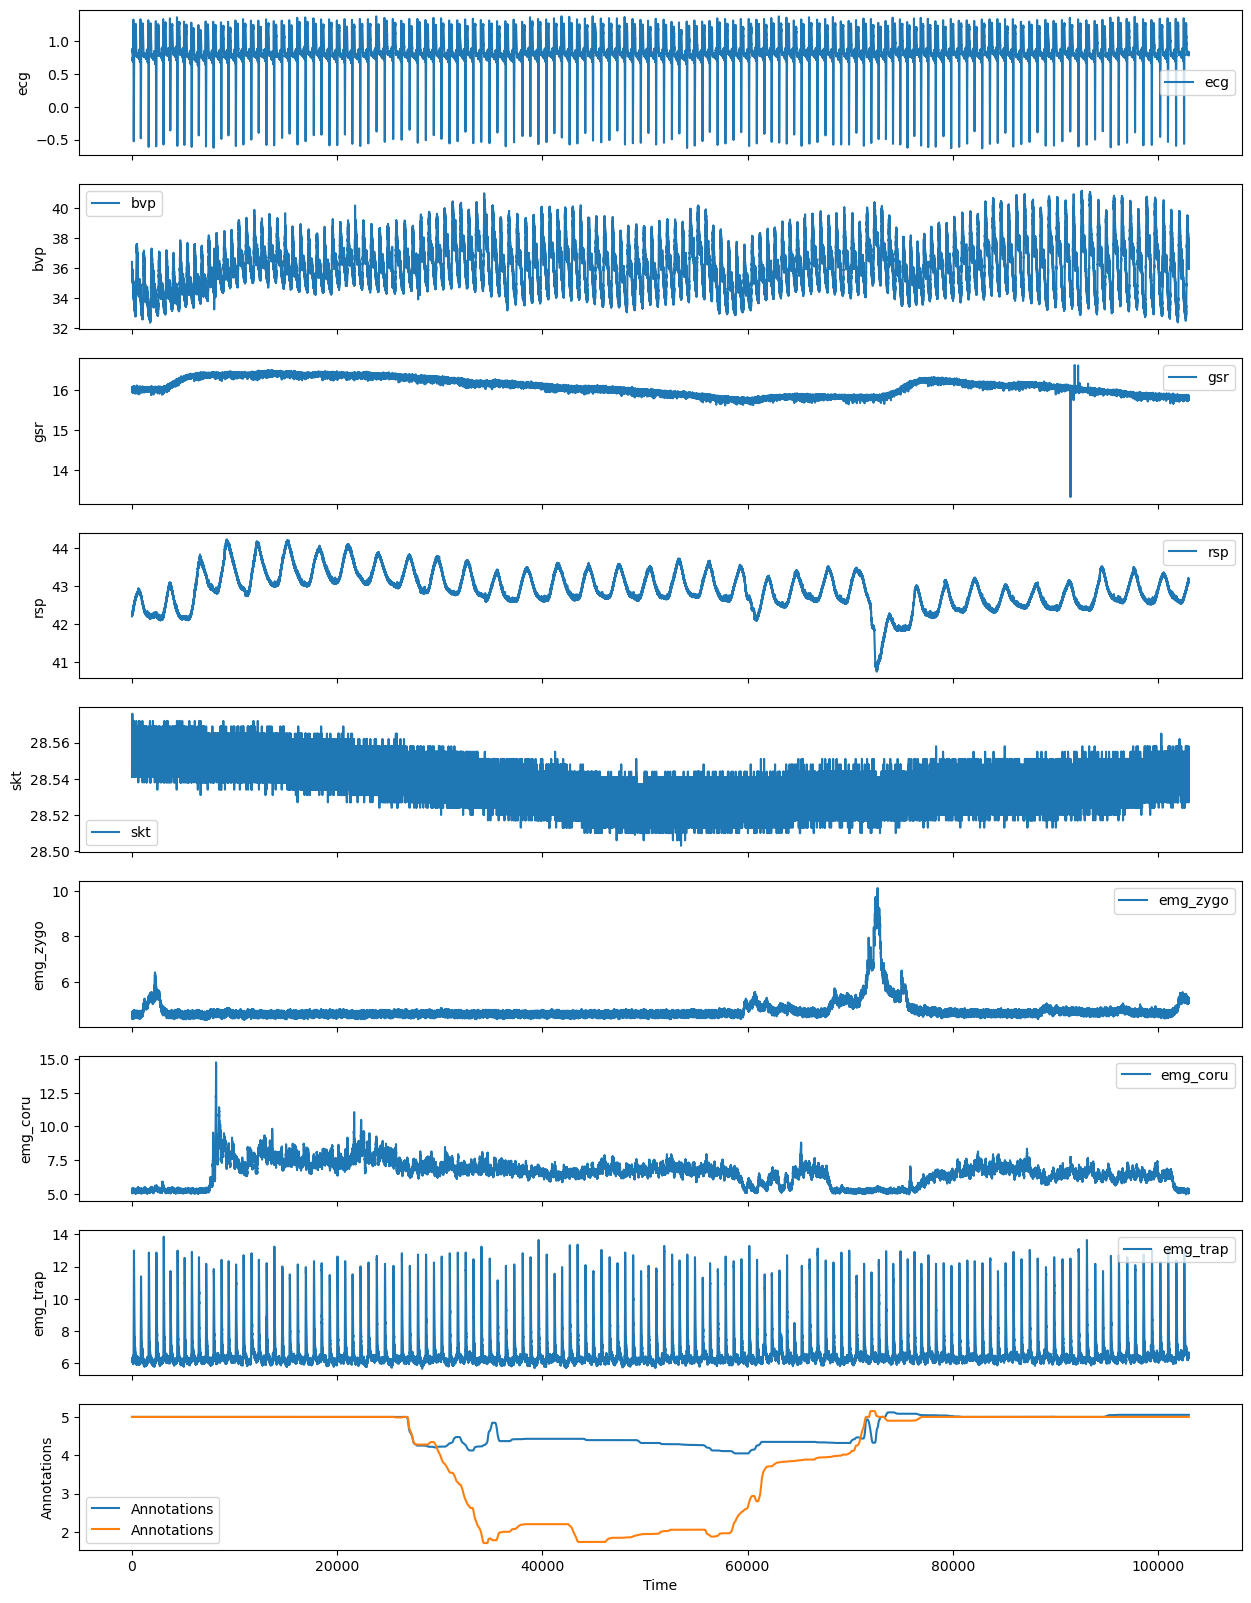

In [44]:
# Create a new figure
fig, ax = plt.subplots(9, 1, figsize=(15, 20), sharex=True)

# Plot all 8 physiological signals
for idx, signal in enumerate(train_physiology.columns):
    ax[idx].plot(train_physiology[signal], label=signal)
    ax[idx].set_ylabel(signal)
    ax[idx].legend()

# Plot the annotations timeseries
ax[8].plot(train_annotations, label="Annotations")
ax[8].set_ylabel("Annotations")
ax[8].legend()

# Set the xlabel for the last subplot
ax[8].set_xlabel("Time")

# Show the plot
plt.show()

In [45]:
import matplotlib.pyplot as plt

from pathlib import Path

results_dir = Path("../results/exploratory/scenario_1/all_data")
if not results_dir.exists():
    results_dir.mkdir(parents=True)


def plot_and_save(sub, video, scenario):
    # Load data
    file_name = f"sub_{sub}_vid_{video}.csv"
    train_physiology = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/physiology", file_name), index_col="time")
    train_annotations = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/annotations", file_name), index_col="time")

    # Create a new figure
    fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(15, 20), sharex=True)
    
    # Plot physiology signals
    for i, signal in enumerate(train_physiology.columns):
        ax[i].plot(train_physiology.index, train_physiology[signal], label=signal)
        ax[i].set_title(signal)
        ax[i].legend(loc='upper right')

    # Plot annotations
    ax[8].plot(train_annotations.index, train_annotations["arousal"], label="arousal", color="r")
    ax[8].plot(train_annotations.index, train_annotations["valence"], label="valence", color="b")
    ax[8].set_title("Annotations - Arousal and Valence")
    ax[8].legend(loc='upper right')

    # Set main title
    fig.suptitle(f"Participant {sub}, Video {video}, Scenario {scenario}")

    # Save the plot as a .png file
    fig.savefig(Path(f"../results/exploratory/sub_{sub}_vid_{video}_scenario_{scenario}.png"))
    plt.close(fig)


In [30]:
# Settings
scenario = 1
counter = 0
#max_files = 3

# Iterate over subjects and videos
physiology_dir = Path(f"../data/raw/scenario_{scenario}/train/physiology")
pattern = re.compile(r"sub_(\d+)_vid_(\d+)\.csv")

for file in physiology_dir.iterdir():
    match = pattern.match(file.name)
    if match:
        sub = int(match.group(1))
        video = int(match.group(2))
        plot_and_save(sub, video, scenario)
        counter += 1
#        if counter >= max_files:
#            break

Example of increase in arousal and decrease in valence coincident with:
- increased gsr activity
- increased emg_zygo activity
- lower emg_cory activity
  
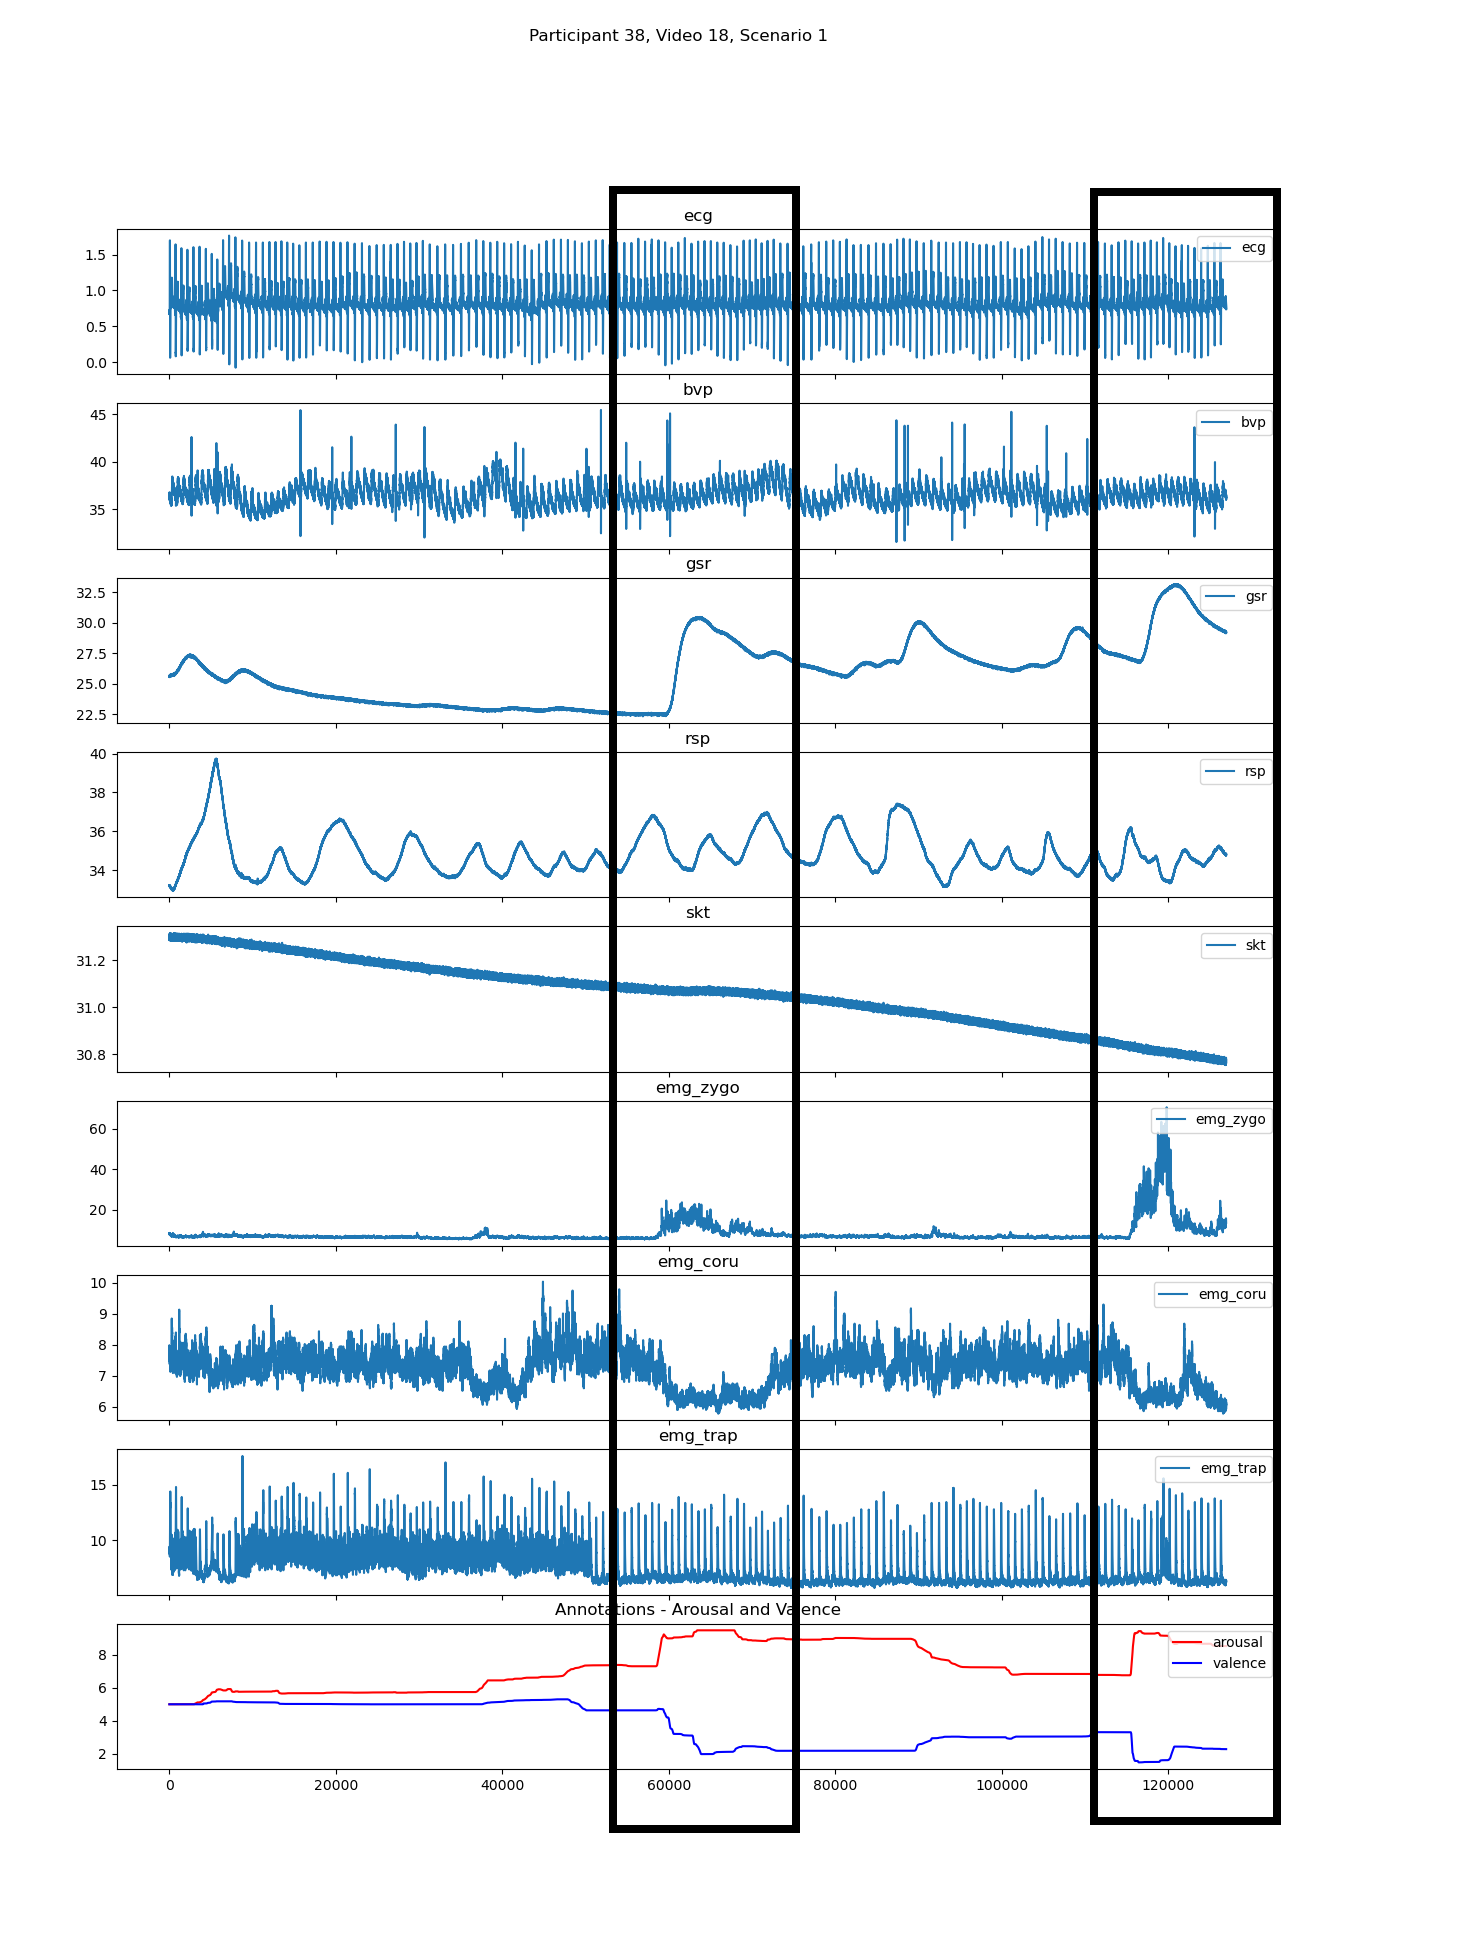

Make a single plot showing all valence time series per video for all participants (e.g. `vid_1` of sub_1, sub_4, ..., sub_45) and another plot showing all arousal time series per video for all participants for subject 1.
In this way we should have 8 valence plots and 8 arousal plots per participant. Each plot should have the overlapping time series of each affective dimension (and not be a plot with subplots).

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')


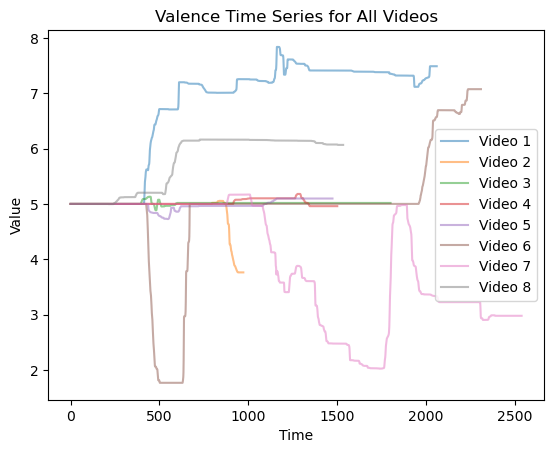

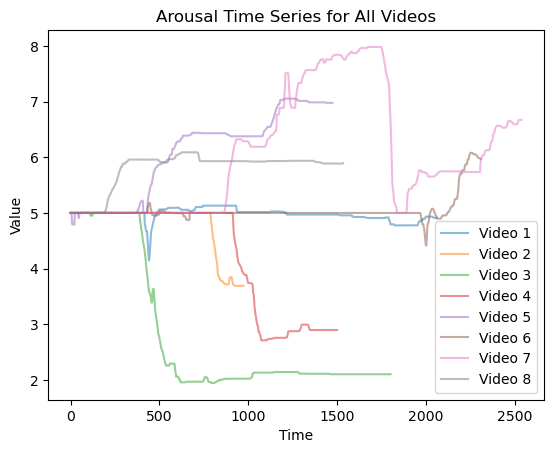

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_series(data, affective_dimension, title):
    for idx, participant_data in enumerate(data):
        plt.plot(participant_data[affective_dimension], alpha=0.5, label=f"Video {idx+1}")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

def load_data(scenario, subject, video):
    file_path = f"../data/raw/scenario_{scenario}/train/annotations/sub_{subject}_vid_{video}.csv"
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        print(f"Loaded data columns: {data.columns}")  # Add this line to print the DataFrame's columns
        return data
    else:
        return None

scenario = 1
subjects = [1] #, 4, 6, 7, 8, 9, 11, 12 13, 15, 17, 18, 19, 20, 22, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 41, 43, 45]
videos = [1, 9, 10, 11, 13, 14, 18, 20]

# Assuming 8 videos for each participant
valence_data = []
arousal_data = []

for subject in subjects:
    for video in videos:
        # Replace 'scenario' with the appropriate scenario number
        data = load_data(scenario, subject, video)
        if data is not None:
            valence_data.append(data)
            arousal_data.append(data)

plot_time_series(valence_data, "valence", "Valence Time Series for All Videos")
plot_time_series(arousal_data, "arousal", "Arousal Time Series for All Videos")



Make a single plot showing all valence time series per video for all participants (e.g. `vid_1` of sub_1, sub_4, ..., sub_45) and another plot showing all arousal time series per video for all participants. In this way we should have 8 valence plots and 8 arousal plots per participant. Each plot should have the overlapping time series of each affective dimension (and not be a plot with subplots).

In [53]:
def save_plots(scenario, subject):
    valence_data = []
    arousal_data = []

    for video in videos:
        data = load_data(scenario, subject, video)
        if data is not None:
            valence_data.append(data)
            arousal_data.append(data)

    # Create directory if it doesn't exist
    os.makedirs(f"../results/exploratory/scenario_{scenario}/annotations_per_subject", exist_ok=True)

    # Save Valence plot
    for participant_data in valence_data:
        plt.plot(participant_data["valence"], alpha=0.5)
    plt.title(f"Valence Time Series for Subject {subject} in Scenario {scenario}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.savefig(f"../results/exploratory/scenario_{scenario}/annotations_per_subject/sub_{subject}_scenario_{scenario}_valence.png")
    plt.close()

    # Save Arousal plot
    for participant_data in arousal_data:
        plt.plot(participant_data["arousal"], alpha=0.5)
    plt.title(f"Arousal Time Series for Subject {subject} in Scenario {scenario}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.savefig(f"../results/exploratory/scenario_{scenario}/annotations_per_subject/sub_{subject}_scenario_{scenario}_arousal.png")
    plt.close()
    
scenario = 1
subjects = [1, 4, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 19, 20, 22, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 41, 43, 45]

for subject in subjects:
    save_plots(scenario, subject)

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

Do the same task but instead of aggregating by subect. This way, make a single plot showing all valence time series per video for all videos  and another plot showing all arousal time series per video for all participants. In this way we should have 8 valence plots and 8 arousal plots per video. Each plot should have the overlapping time series of each affective dimension.

In [54]:
def save_video_plots(scenario, video):
    valence_data = []
    arousal_data = []

    for subject in subjects:
        data = load_data(scenario, subject, video)
        if data is not None:
            valence_data.append(data)
            arousal_data.append(data)

    # Create directory if it doesn't exist
    os.makedirs(f"../results/exploratory/scenario_{scenario}/annotations_per_video", exist_ok=True)

    # Save Valence plot
    for participant_data in valence_data:
        plt.plot(participant_data["valence"], alpha=0.5)
    plt.title(f"Valence Time Series for Video {video} in Scenario {scenario}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.savefig(f"../results/exploratory/scenario_{scenario}/annotations_per_video/scenario_{scenario}_video_{video}_valence.png")
    plt.close()

    # Save Arousal plot
    for participant_data in arousal_data:
        plt.plot(participant_data["arousal"], alpha=0.5)
    plt.title(f"Arousal Time Series for Video {video} in Scenario {scenario}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.savefig(f"../results/exploratory/scenario_{scenario}/annotations_per_video/scenario_{scenario}_video_{video}_arousal.png")
    plt.close()

scenario = 1
videos = [1, 9, 10, 11, 13, 14, 18, 20]

for video in videos:
    save_video_plots(scenario, video)

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

Do the same but instead of ploting all the time series of arousal and valence, in each 16 graph plot the mean of all the times series of subject (in solid line) and also represent the santard deviation of the times series of each video and affective dimension in a lighter color. Save this in "../results/exploratory/scenario_{scenario}/annotations_per_video_mean"

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

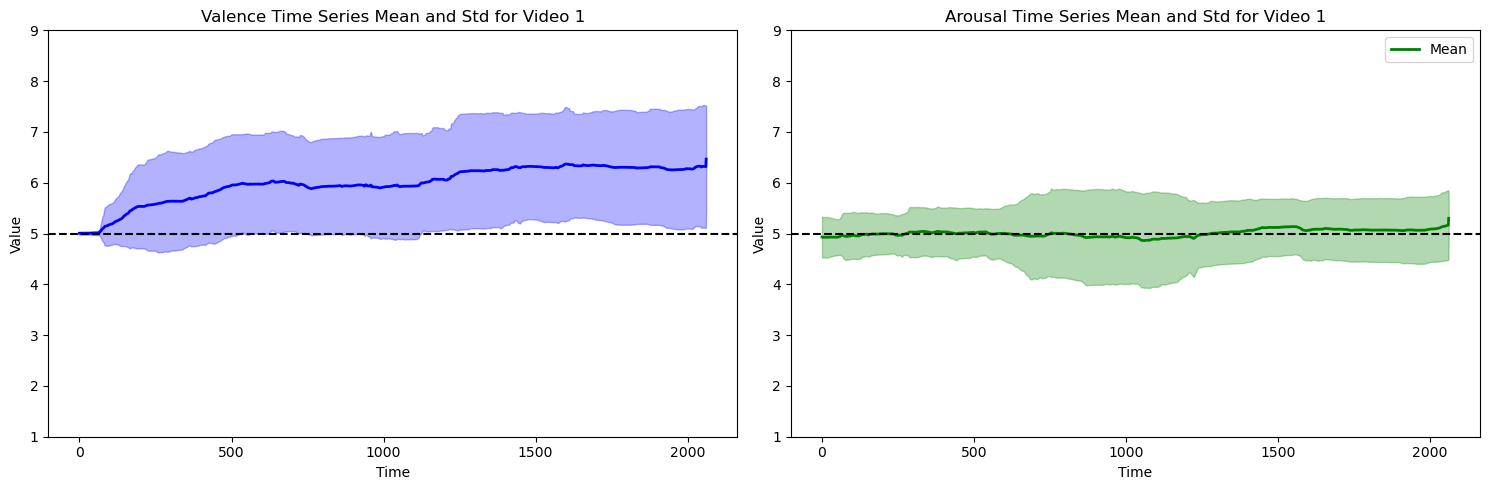

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

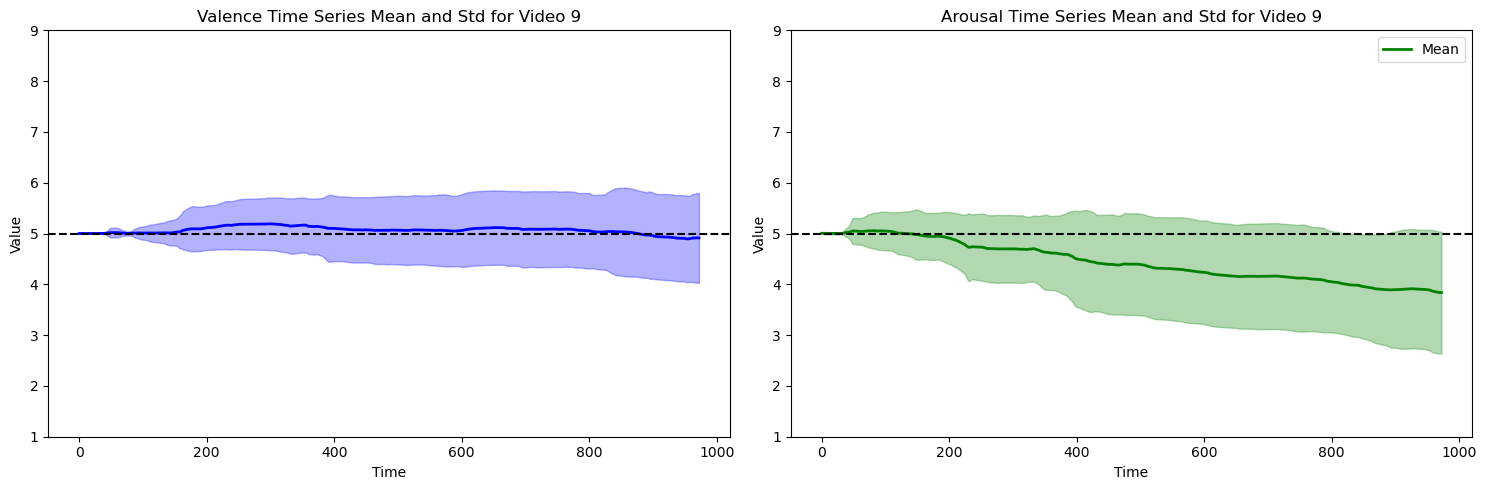

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

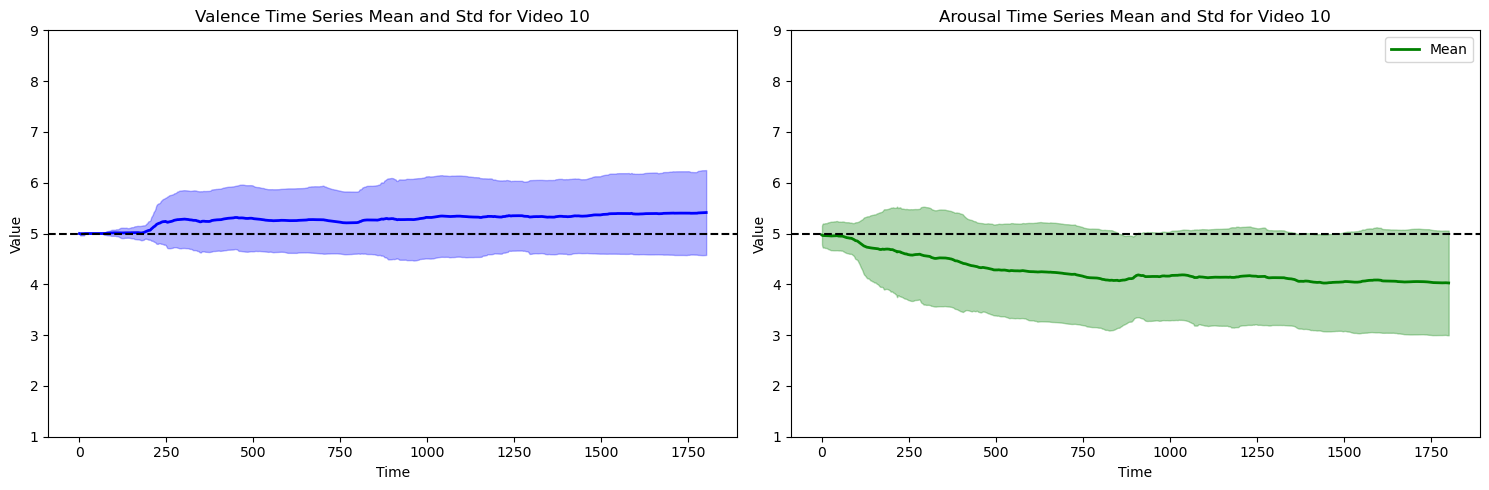

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

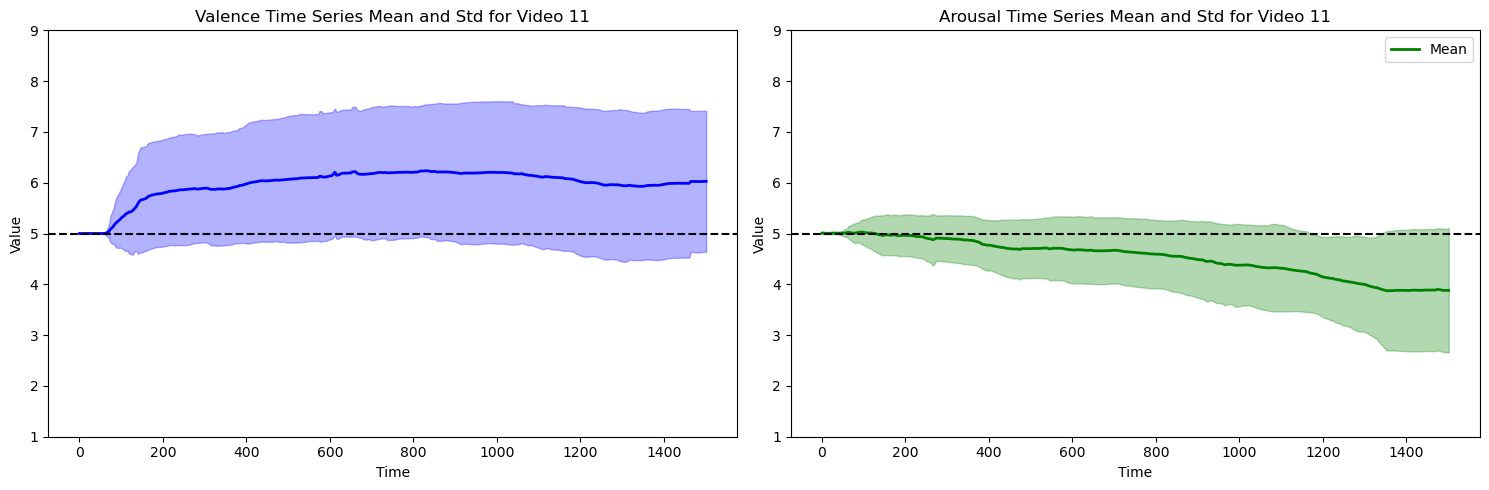

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

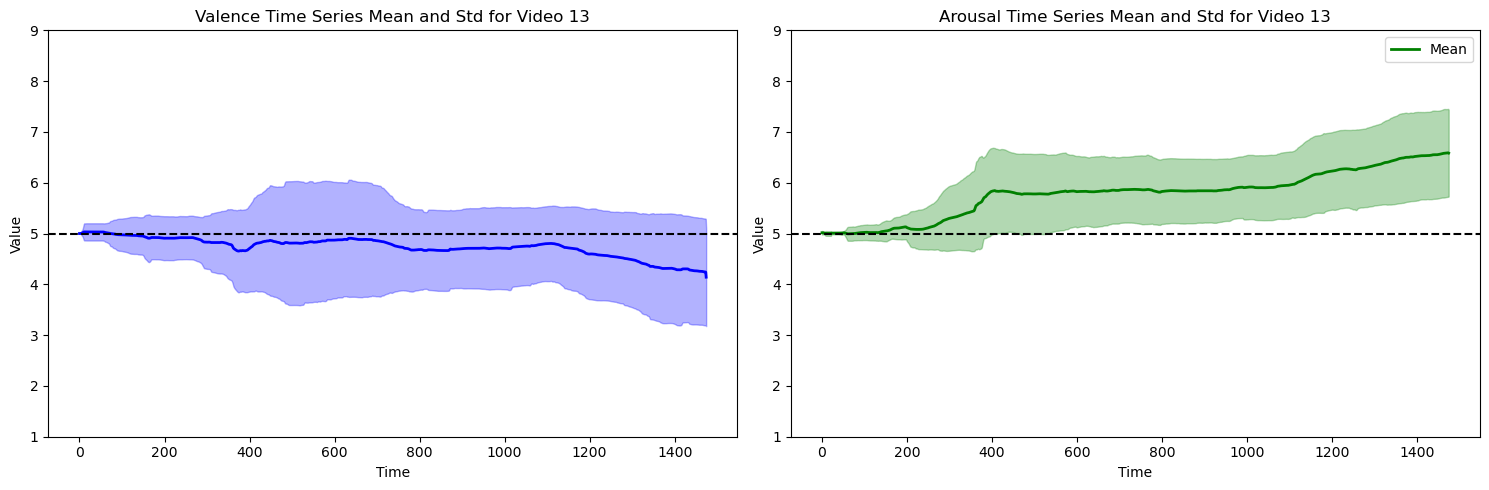

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

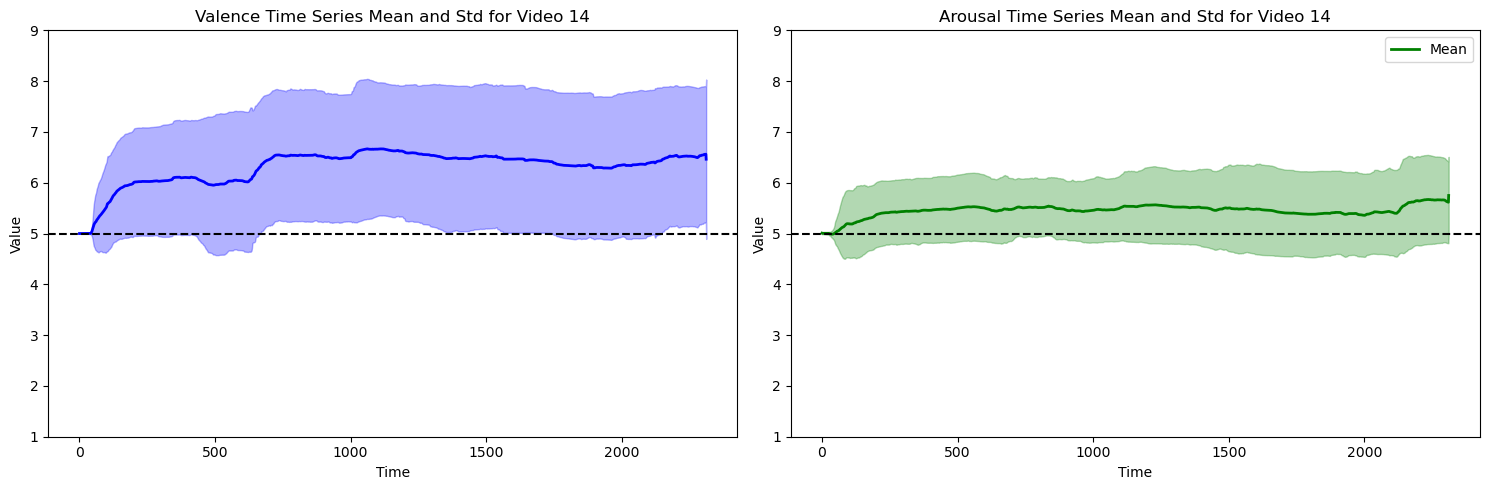

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

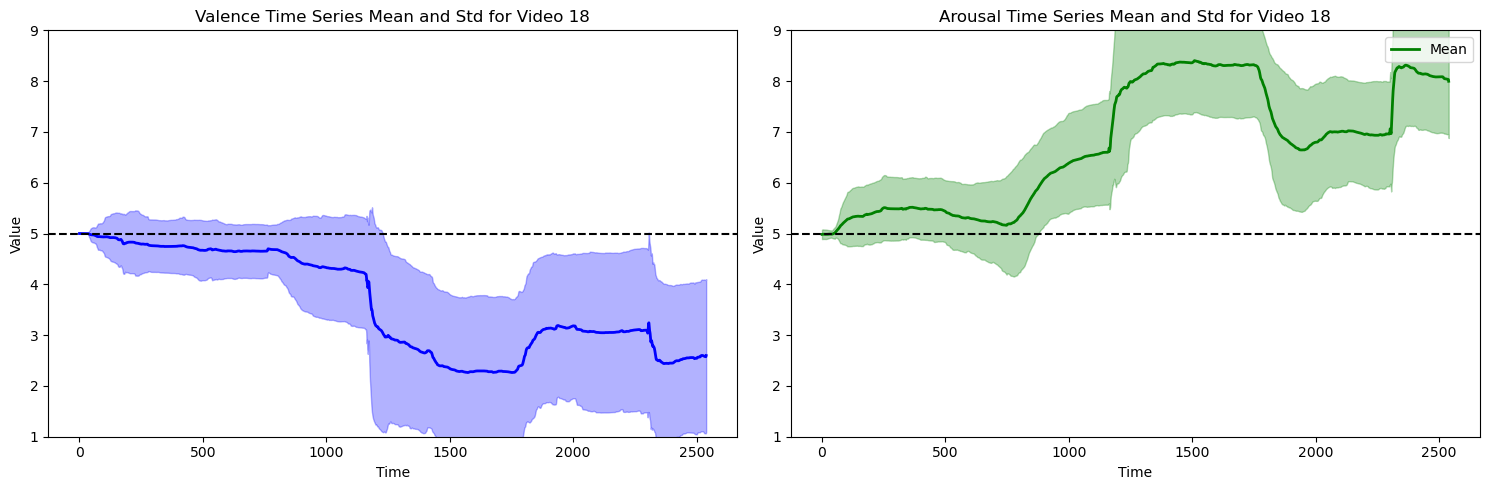

Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Index(['time', 'valence', 'arousal'], dtype='object')
Loaded data columns: Inde

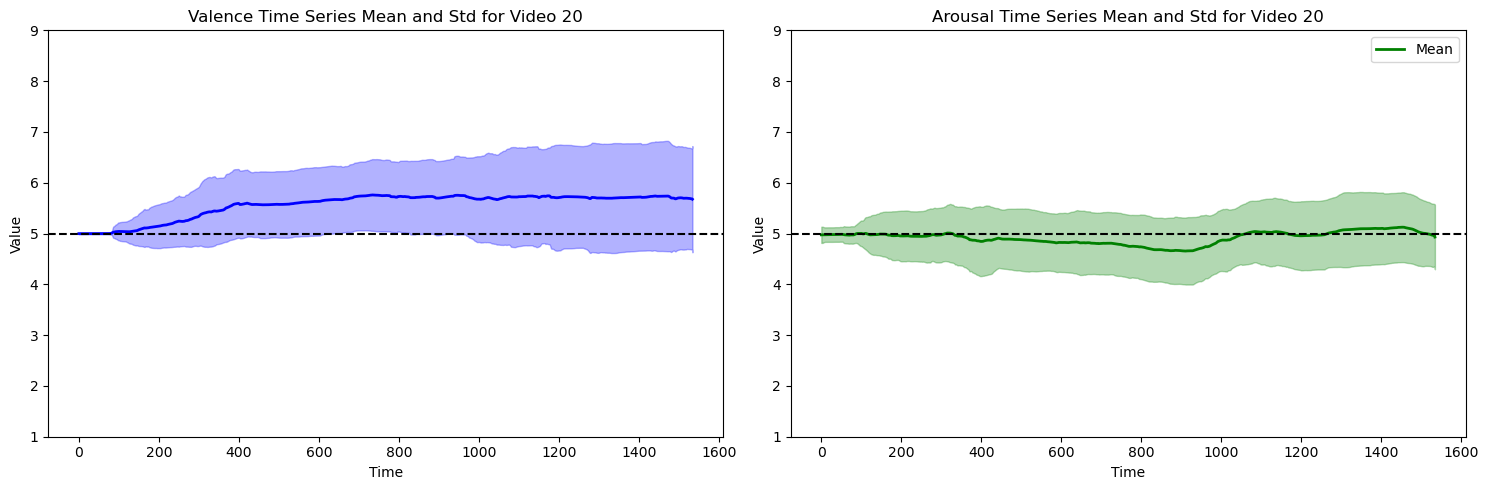

In [57]:
import numpy as np

def pad_series(data, max_length):
    return np.pad(data, (0, max_length - len(data)), 'constant', constant_values=(np.nan,))

def save_video_mean_std_plots(scenario, video):
    valence_data = []
    arousal_data = []

    max_length = 0
    for subject in subjects:
        data = load_data(scenario, subject, video)
        if data is not None:
            max_length = max(max_length, len(data))
            valence_data.append(data["valence"].values)
            arousal_data.append(data["arousal"].values)

    # Pad the time series data with NaN values
    valence_data = [pad_series(data, max_length) for data in valence_data]
    arousal_data = [pad_series(data, max_length) for data in arousal_data]

    # Calculate mean and standard deviation
    valence_mean = np.nanmean(valence_data, axis=0)
    valence_std = np.nanstd(valence_data, axis=0)
    arousal_mean = np.nanmean(arousal_data, axis=0)
    arousal_std = np.nanstd(arousal_data, axis=0)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(valence_mean, label="Mean", color="blue", linewidth=2)
    ax1.fill_between(range(len(valence_mean)), valence_mean - valence_std, valence_mean + valence_std, alpha=0.3, color="blue")
    ax1.axhline(y=5, linestyle='--', color='black')
    ax1.set_ylim(1, 9)
    ax1.set_title(f"Valence Time Series Mean and Std for Video {video}")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Value")

    ax2.plot(arousal_mean, label="Mean", color="green", linewidth=2)
    ax2.fill_between(range(len(arousal_mean)), arousal_mean - arousal_std, arousal_mean + arousal_std, alpha=0.3, color="green")
    ax2.axhline(y=5, linestyle='--', color='black')
    ax2.set_ylim(1, 9)
    ax2.set_title(f"Arousal Time Series Mean and Std for Video {video}")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Value")

    plt.legend()
    plt.tight_layout()
    plt.savefig(f"../results/exploratory/scenario_{scenario}/annotations_per_video_mean/sub_{video}_scenario_{scenario}_annotations_per_video_mean.png")
    plt.show()

for scenario in range(1, 2):
    for video in videos:
        save_video_mean_std_plots(scenario, video)